# Importing Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
hData = pd.read_csv("C:\\Users\\aloky\\OneDrive\\Desktop\\Sentiment Analysis\\god knows\\Processed\\customer_service_processed.csv")

In [3]:
hData.head()

Unnamed: 0                                             Tweets Sentiment
0           0  akasaair harassed bangalore airport today grou...  Negetive
1           1  experience airport staff pleasantwas overwhelm...  Positive
2           2  indigo6e front desk girl power margret bangalo...  Positive
3           3  blrairport would like thanks mr manjunath team...  Positive
4           4  blrairport bangalore airport lounge ambience h...  Positive

In [4]:
hData = hData.drop(hData.columns[hData.columns.str.contains('Unnamed', case=False)], axis=1)

In [5]:
hData.head()

Tweets Sentiment
0  akasaair harassed bangalore airport today grou...  Negetive
1  experience airport staff pleasantwas overwhelm...  Positive
2  indigo6e front desk girl power margret bangalo...  Positive
3  blrairport would like thanks mr manjunath team...  Positive
4  blrairport bangalore airport lounge ambience h...  Positive

In [6]:
hData.Sentiment.value_counts()

Sentiment
Positive    7
Negetive    3
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Sentiments')

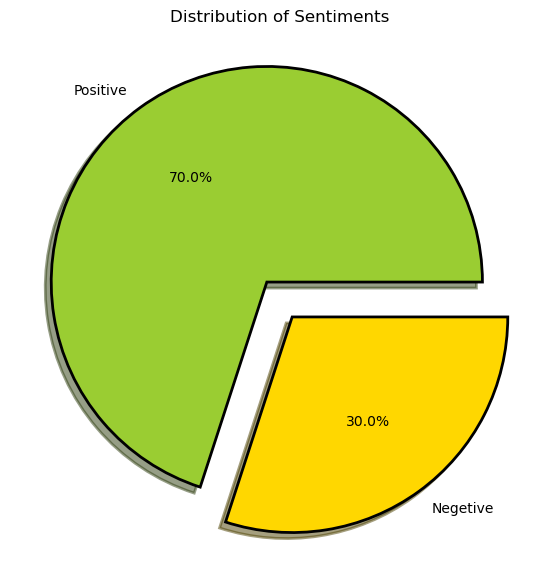

In [7]:
# Pie-Chart
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp={'linewidth':2, 'edgecolor':"black"}
tags = hData['Sentiment'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie', shadow=True, colors=colors, autopct='%1.1f%%', wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of Sentiments")

## Analysis on the Negetive Tweets

In [8]:
# Collecting all the Negetive Tweets from the dataset
negetive_tweets = hData[hData.Sentiment == 'Negetive']

negetive_reviwes = negetive_tweets['Tweets'].tolist()

In [9]:
custom_stop_words = ["experience", "nice", "facilities", "staff", "domestic", "terminal", "international", 
                     "visit", "time", "comfortable","already", "amp", "guys", "pls", 'im', "us", "another",
                     "next", "god", "hope", "bless", "value", "dearest", "get" , "im", "mins", "till", "still", "already"]

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
new_stop_words = [frozenset(stop_words)]
stop_words = new_stop_words + custom_stop_words

In [12]:
# Weightage of the words in the tweets
vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = new_stop_words)
x = vectorizer.fit_transform(negetive_reviwes)

In [13]:
# Lda model
num_topics = 5
lda = LatentDirichletAllocation(n_components = num_topics, random_state=40)
lda.fit(x)

LatentDirichletAllocation(n_components=5, random_state=40)

In [14]:
num_top_words = 4
feature_names = vectorizer.get_feature_names_out()
topics=[]

In [15]:
# Extracting the topics from LDA model
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics.append(top_words)

for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {',' .join(topic)}")

Topic 1: staff,experience
Topic 2: staff,experience
Topic 3: experience,staff
Topic 4: staff,experience
Topic 5: staff,experience


# Observation for negative tweets:
## 1) Unprofessional behaviour and disrespectful attitude:
#### •	The staff has displayed untrained, shrewd, and arrogant behaviour which has led to a feeling of helplessness and ridicule among passengers.
#### •	Etihad Airways at the Bangalore Airport is reported to have exhibited a disgusting and rude attitude during the checking process as well.
## 2) Rude and harassing staff:
#### •	Air Vistara's staff at Bangalore Airport is described as being extremely rude. The passengers allegedly felt harassed and disrespected during their interaction with the staff.


## Analysis on the Positive Tweets

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
custom_stop_words = ["experience", "nice", "facilities", "staff", "domestic", "terminal", "international", 
                     "visit", "time", "comfortable", "much", "waiting", "time", "need", "also", "first", "since",
                     "always", "please", "last", "even", "near", "entire", "lot", "many", "used", "one", "entire", "though",
                     "amp", "us", "guys", "lol", "ps", "knows", "long", "inside", "many", "got" , "mr", "new" ,"would" ,"felt",
                     "doesn't", "took", "t2", "080", "hr", "basis", "stretch"]
stop_words = stop_words + custom_stop_words
new_stop_words = [frozenset(stop_words)]

In [17]:
# Collecting all the Positive Tweets from the dataset
positive_tweets = hData[hData.Sentiment == 'Positive']
positive_reviews = positive_tweets['Tweets'].tolist()

In [18]:
# Weightage of the words in the tweets
vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = stop_words)
x = vectorizer.fit_transform(positive_reviews)

In [19]:
# Lda model
num_topics = 7
lda = LatentDirichletAllocation(n_components = num_topics, random_state=1)
lda.fit(x)

LatentDirichletAllocation(n_components=7, random_state=1)

In [20]:
num_top_words = 12
feature_names = vectorizer.get_feature_names_out()
topics=[]

In [21]:
# Extracting the topics from LDA model
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics.append(top_words)

for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {',' .join(topic)}")

Topic 1: good,blrairport,food,girl,wonderful,indigo6e,flight,payment,lounge,live,liquors,wide
Topic 2: indigo6e,girl,blrairport,wonderful,flight,food,good,spending,tasty,counters,equally,extra
Topic 3: blrairport,wonderful,indigo6e,flight,girl,food,good,served,tasty,counters,equally,extra
Topic 4: flight,wonderful,indigo6e,blrairport,girl,food,good,served,counters,equally,extra,tasty
Topic 5: ambience,lounge,counters,including,wide,liquors,equally,live,payment,quite,served,spending
Topic 6: blrairport,wonderful,indigo6e,flight,girl,food,good,served,tasty,counters,equally,extra
Topic 7: blrairport,wonderful,indigo6e,flight,girl,food,good,served,tasty,counters,equally,extra


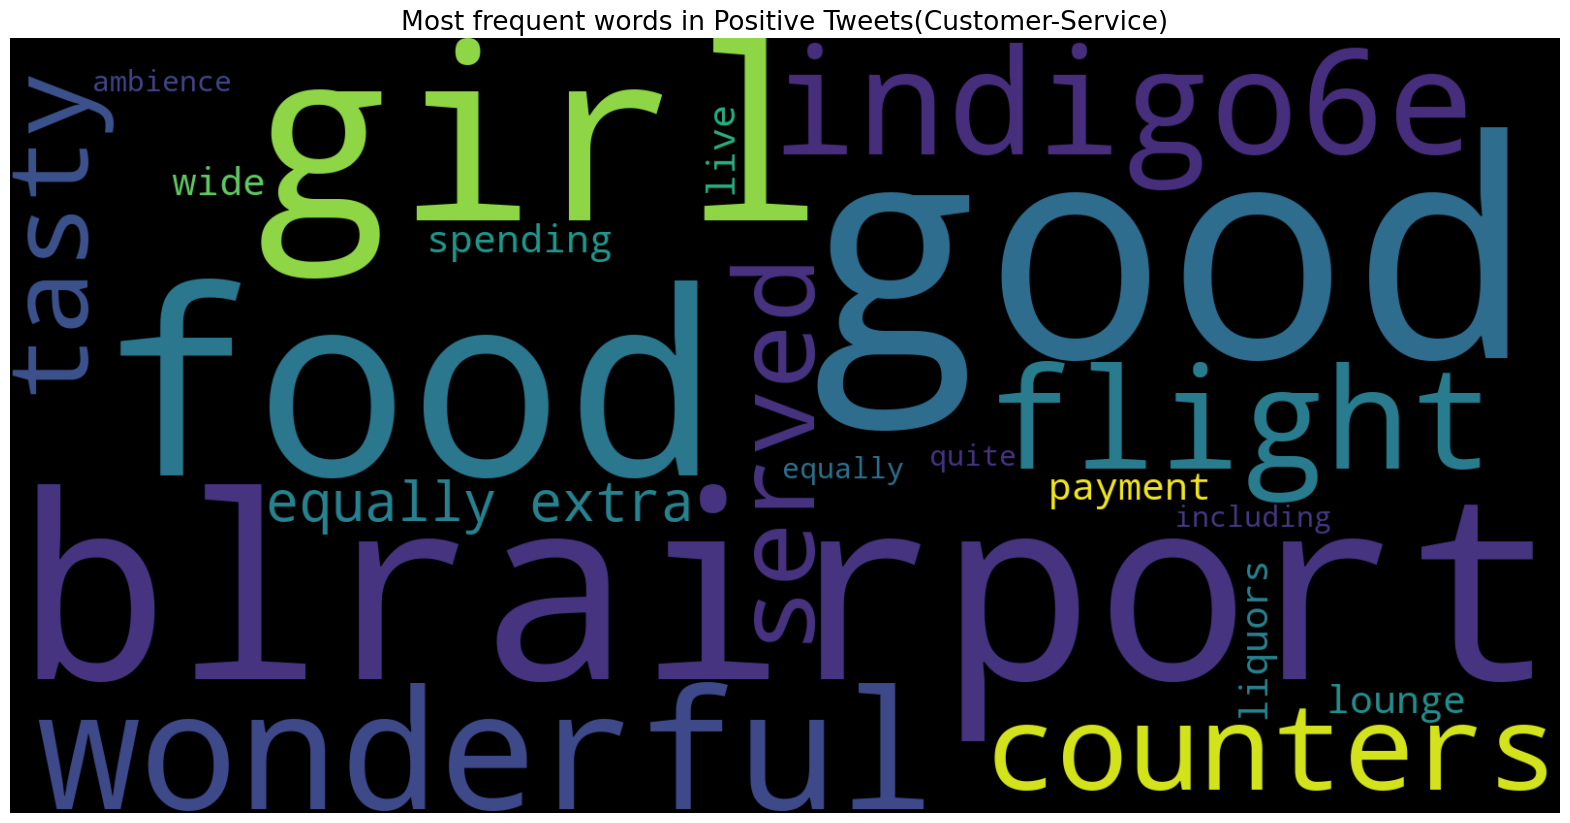

In [22]:
# WordCloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud= WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets(Customer-Service)', fontsize=19)
plt.show()

# Observation for positive tweets:
## 1) Pleasant and helpful staff
#### •	The staff at Bangalore Airport are praised for their pleasant and helpful assistance provided by Indigo Airlines.
#### •	The Bangalore Airport team was said to be polite and give customer-oriented service and food provided , especially during the pandemic. Demonstrating their dedication and efforts.
## 2) Acknowledgment of airport authorities:
#### •	Despite the delayed flights, the airport authorities are recognised for their efforts in providing hospitality to passengers during the waiting period which led to a comfortable experience.
